

# Inicialização

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Guilherme
dataset = pd.read_excel('/content/drive/MyDrive/PUC/2025.1/EQM2118/Trabalho em grupo/Base de dados/hi.xlsx', sheet_name='Sheet1')
dataset

,E,v,aa,pc,c,d - path:60,step,f,w
0,30209.170,0.247,48.819,109.320,29.87,5.459536e-16,0,0.05,0.000000
1,43116.820,0.306,53.204,98.399,26.64,4.539460e-16,0,0.05,0.000000
2,25227.270,0.314,40.740,85.132,52.85,9.381705e-16,0,0.05,0.000000
3,14584.120,0.330,47.252,77.328,27.67,1.864141e-15,0,0.05,0.000000
4,5526.125,0.271,44.732,151.460,34.08,5.411856e-15,0,0.05,0.000000
...,...,...,...,...,...,...,...,...,...
5455,29756.270,0.313,39.239,74.987,39.62,2.873153e+01,9,0.15,22.994869
5456,20018.920,0.343,42.090,206.090,47.46,8.975783e+01,9,0.15,73.630961
5457,10960.920,0.249,51.006,214.670,16.66,2.714478e+02,9,0.15,233.538467
5458,22509.870,0.257,48.047,85.913,14.91,6.063238e+01,9,0.15,44.885417


array([[<Axes: title={'center': 'E'}>, <Axes: title={'center': 'v'}>,
        <Axes: title={'center': 'aa'}>],
       [<Axes: title={'center': 'pc'}>, <Axes: title={'center': 'c'}>,
        <Axes: title={'center': 'd - path:60'}>],
       [<Axes: title={'center': 'step'}>, <Axes: title={'center': 'f'}>,
        <Axes: title={'center': 'w'}>]], dtype=object)

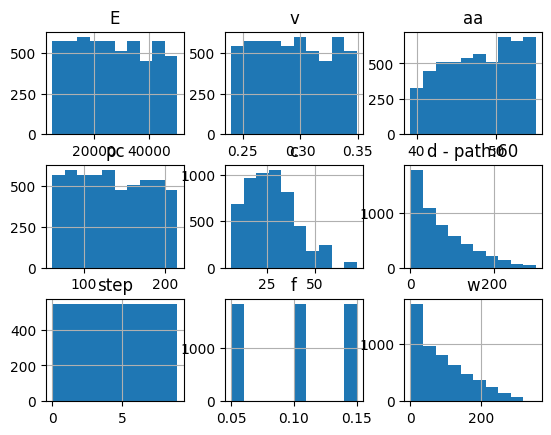

In [ ]:
dataset.hist()

# Correlações

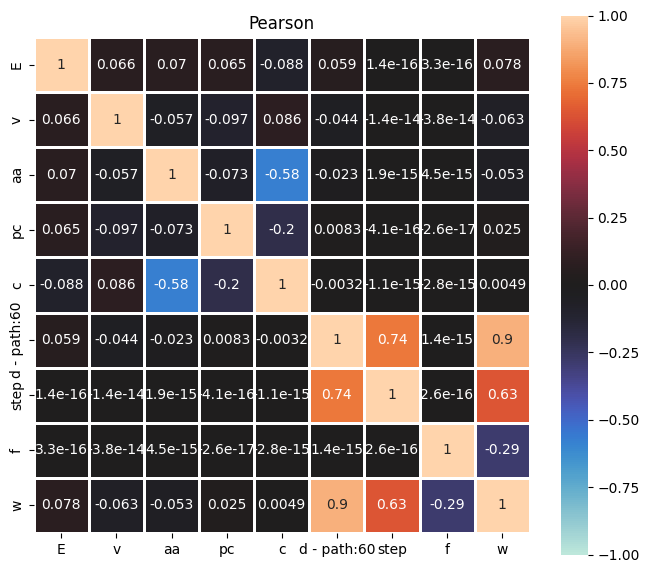

In [ ]:
#calculo das correlações lineares do Pearson entre variáveis
corr = dataset.iloc[:,:].corr()
corr

fig = plt.figure(figsize = (8,7))
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 square=True,
                 annot=True,
                 linewidths=0.8)
ax.set_ylim(len(corr),0)
plt.title('Pearson')
plt.show()

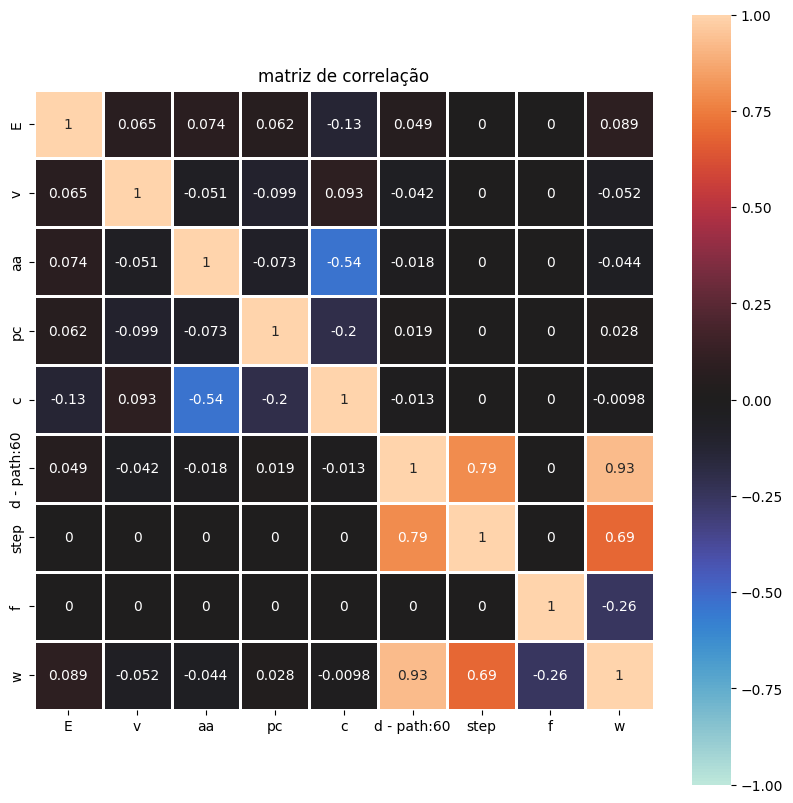

In [ ]:
#calculo das correlações lineares do Spearman entre variáveis
corr_mod = dataset.iloc[:,:].corr(method='spearman')
corr_mod

fig = plt.figure(figsize = (10,10))
ax = sns.heatmap(corr_mod,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 square=True,
                 annot=True,
                 linewidths=0.8)
ax.set_ylim(len(corr_mod),0)
plt.title('matriz de correlação')
plt.show()

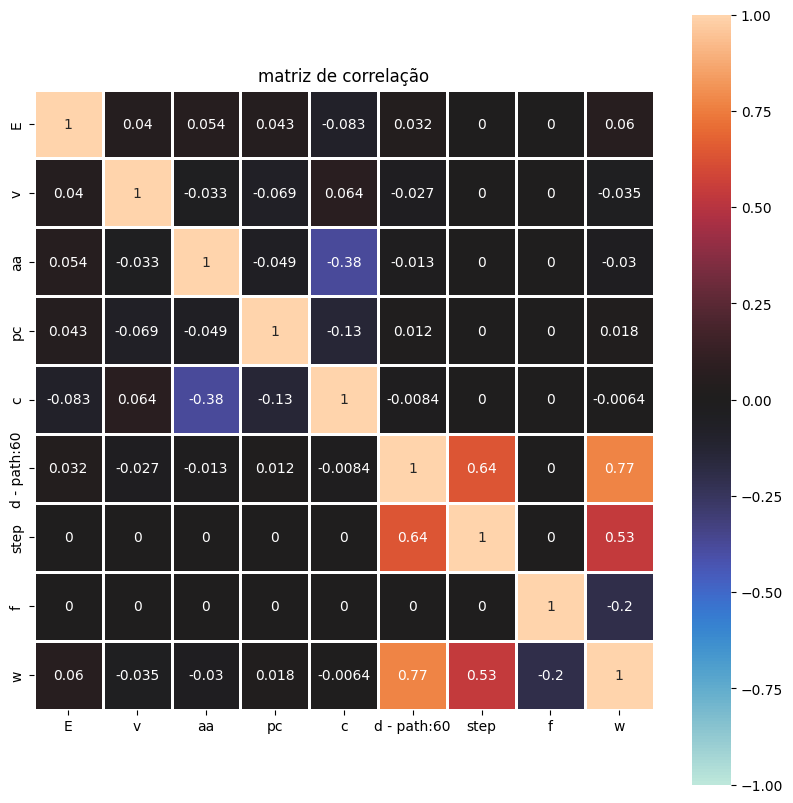

In [ ]:
#calculo das correlações lineares do kendall entre variáveis
corr_mod = dataset.iloc[:,:].corr(method='kendall')
corr_mod

fig = plt.figure(figsize = (10,10))
ax = sns.heatmap(corr_mod,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 square=True,
                 annot=True,
                 linewidths=0.8)
ax.set_ylim(len(corr_mod),0)
plt.title('matriz de correlação')
plt.show()

# Outliers

In [ ]:
#Envelope Elíptico https://arxiv.org/pdf/1709.07045.pdf

from sklearn.covariance import EllipticEnvelope

import warnings
warnings.filterwarnings("ignore")

#Retorna -1 se a amostra é Outlier e 1 caso contrário
#O parâmetro 'contamination' é a proporção de Outliers no
#Varia entre (0 - 0.5)

out_EE = EllipticEnvelope(contamination=0.1).fit_predict(dataset)
outliers = dataset[out_EE == -1]
X_out = dataset[out_EE == 1]
print('Nº Outliers: %i' % outliers.shape[0])
print('\nDados sem Outliers')
print('Nº Variáveis: %i' %X_out.shape[1])
print('Nº Amostras: %i' %X_out.shape[0])

Nº Outliers: 546

Dados sem Outliers
Nº Variáveis: 9
Nº Amostras: 4914


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

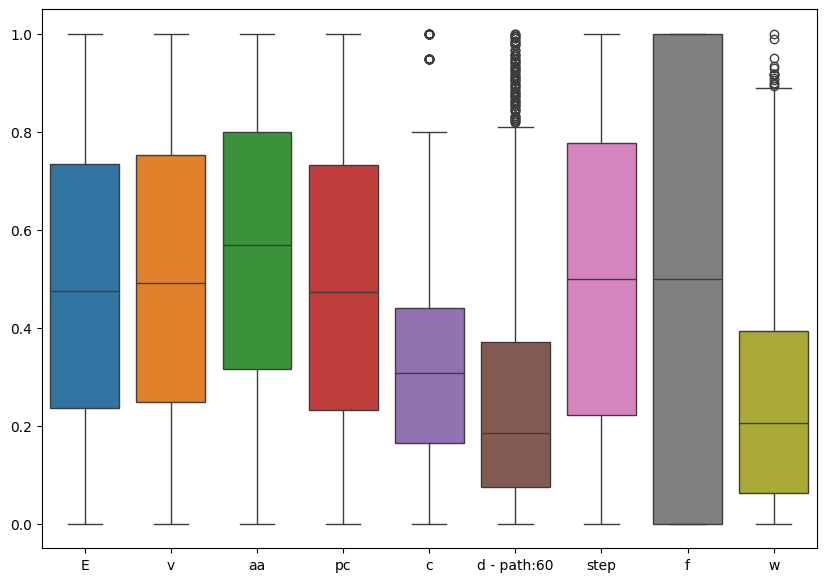

In [ ]:
fig = plt.figure(figsize =(10, 7))
sns.boxplot(data=df_normalizado)
plt.show()

# Chi 2

In [ ]:
# Modelo
model = sm.GLM(df_normalizado['w'], df_normalizado.drop(['w'], axis=1), family=sm.families.Poisson())
results = model.fit()


In [ ]:
print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      w   No. Observations:                 5460
Model:                            GLM   Df Residuals:                     5452
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.1
Date:                Sat, 17 May 2025   Deviance:                       542.06
Time:                        18:14:23   Pearson chi2:                     434.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1092
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
E              -0.1970      0.092     -2.139      

 1. Ajuste global (goodness-of-fit)
*   Pearson chi² = 434 está agora bem menor do que o número de graus de liberdade (5452), o que indica que não há mais superdispersão significativa.
*   O valor da deviance (542.06) também é muito menor.
*   Conclusão: o modelo está ajustando melhor e de forma mais estatisticamente confiável. Pode-se confiar mais nos testes z e nos intervalos de confiança agora.

 2. Coeficientes
*    Como as variáveis estão normalizadas (padronizadas), os coeficientes podem ser comparados diretamente para avaliar importância relativa das variáveis:
*    Um coeficiente β indica que para um aumento de 1 desvio-padrão na variável, o valor esperado de w é multiplicado por exp(β).

 3. Significância estatística
*    Todas as variáveis exceto step são estatisticamente significativas (p < 0.05).
*    step tem p-valor 0.572 → sem efeito estatisticamente detectável sobre w.
*    Pode-se considerar removê-la do modelo para simplicidade, se fizer sentido teórico.


Erro Médio Quadrático (MSE): 0.005247719503447559
Coeficientes do Modelo Ridge: [ 0.02178413 -0.01931548 -0.03006097  0.00268265 -0.01068676  0.92883743
 -0.03844043 -0.15514199]


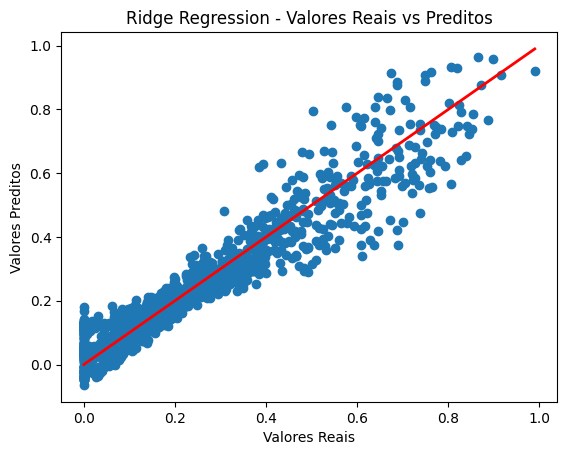

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_normalizado.drop(['w'], axis=1), df_normalizado['w'], test_size=0.2, random_state=42)

# Criando o modelo de Ridge Regression
ridge_regressor = Ridge(alpha=1.0)  # alpha é o parâmetro de regularização

# Treinando o modelo
ridge_regressor.fit(X_train, y_train)

# Fazendo previsões
y_pred = ridge_regressor.predict(X_test)

# Calculando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Médio Quadrático (MSE): {mse}")

# Exibindo os coeficientes do modelo
print("Coeficientes do Modelo Ridge:", ridge_regressor.coef_)

# Visualizando o ajuste do modelo
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Ridge Regression - Valores Reais vs Preditos")
plt.show()